# What is a Mixed-Effects Model?
A mixed-effects model is a type of statistical model that is used to analyze data where measurements are repeated over time or across different groups. It combines fixed effects (which are consistent across all groups) and random effects (which vary between groups).

### Key Concepts
Fixed Effects: These are the effects that are assumed to be the same for all groups. In our model, the fixed effects are Enrollment, Year, Teacher_Count, and Funding. These variables are used to predict the participation rate in the academic support services program.

Random Effects: These are the effects that vary between groups. In our model, the random effect is School. This means that each school might have different baseline participation rates, and the model accounts for this variability.

## How the Model Works
Data Preparation: We start by creating a dataset that includes the variables we want to analyze. Each row represents a measurement for a specific school in a specific year.

### Model Formula:
We define a formula that specifies the relationship between the dependent variable (Participation) and the explanatory variables (Enrollment, Year, Teacher_Count, Funding).

### Fitting the Model:
We use the statsmodels library to fit the mixed-effects model. This involves estimating the coefficients for the fixed effects and the variance of the random effects.

### Interpreting the Results:
The model summary provides the estimated coefficients for each explanatory variable. These coefficients tell us how much the participation rate is expected to change for a one-unit increase in each explanatory variable, while accounting for the variability between schools.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load success and EOPS datasets
df_14_20_success = pd.read_csv("Course_Success_Data_2014_2020.csv")
df_14_20_eops = pd.read_csv("EOPS_Participation_2014_to_2020.csv")
df_20_24_success = pd.read_csv("Course_Success_Data_2020_2024.csv")
df_20_24_eops = pd.read_csv("EOPS_Participation_2020_to_2024.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Merge and concatenate full data range
df_14_20 = df_14_20_success.merge(df_14_20_eops, on=["College", "Year"])
df_20_24 = df_20_24_success.merge(df_20_24_eops, on=["College", "Year"])
merged = pd.concat([df_14_20, df_20_24], ignore_index=True)

# Feature engineering
merged["EOPS Participation Rate"] = merged["EOPS Student Count"] / merged["Student Count"]
merged["Credit Success Rate"] = merged["Credit Success Count"] / merged["Credit Enrollment Count"]
merged["Degree Applicable Success Rate"] = merged["Degree Applicable Success Count"] / merged["Degree Applicable Enrollment Count"]
merged["Transferable Success Rate"] = merged["Transferable Success Count"] / merged["Transferable Enrollment Count"]

# Drop nulls and convert year
merged = merged.dropna(subset=[
    "EOPS Participation Rate", "Credit Success Rate",
    "Degree Applicable Success Rate", "Transferable Success Rate"
])
merged["Year"] = merged["Year"].astype(str)




## Model Summary

This summary presents the results of a Mixed Linear Model analysis, examining the factors influencing participation rates. The model incorporates both fixed effects (variables with effects assumed to be constant across all schools) and random effects (variables allowing for variation between schools).

**Key Components:**

* **Fixed Effects:** These coefficients quantify the average impact of Enrollment, Year, Teacher Count, and Funding on participation rates across all schools in the dataset.

* **Random Effects:** These components capture the variability in participation rates that can be attributed to the unique characteristics of individual schools.

---


## Interpretations
 - Intercept: The baseline participation rate when enrollment, year, teacher count, and funding are zero.
 - Enrollment: For each additional student enrolled, the participation rate increases by 0.21%.
 - Year: Each year, the participation rate increases by 0.254%.
 - Teacher_Count: Each additional teacher increases the participation rate by 4.577%.
 - Funding: Each additional dollar of funding decreases the participation rate by 0.001%.

In [ ]:
import statsmodels.formula.api as smf

# Mixed effects models with interaction terms
model_credit = smf.mixedlm(
    "Q('Credit Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged, groups=merged["College"]
).fit()

model_degree = smf.mixedlm(
    "Q('Degree Applicable Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged, groups=merged["College"]
).fit()

model_transfer = smf.mixedlm(
    "Q('Transferable Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged, groups=merged["College"]
).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# prompt: describe step by step in words how you calculated the Predicted_Participation
# Show model summaries
print("CREDIT SUCCESS MODEL")
print(model_credit.summary())

print("\nDEGREE SUCCESS MODEL")
print(model_degree.summary())

print("\nTRANSFERABLE SUCCESS MODEL")
print(model_transfer.summary())



CREDIT SUCCESS MODEL
                            Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        Q('Credit Success Rate')
No. Observations:          1132           Method:                    REML                    
No. Groups:                114            Scale:                     0.0003                  
Min. group size:           4              Log-Likelihood:            2650.9196               
Max. group size:           10             Converged:                 Yes                     
Mean group size:           9.9                                                               
---------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------
Intercept                                          0.713    0.005 1

The `Predicted_Participation` values are calculated using the fitted mixed-effects model.  Here's a breakdown:

1. **Model Fitting:** A mixed-effects model is trained on the provided training data (`df`). This model establishes relationships between the `Participation` (dependent variable) and the independent variables (`Enrollment`, `Year`, `Teacher_Count`, `Funding`).  Crucially, the model accounts for the random effects of `School`, meaning it recognizes that different schools may have inherent variations in participation rates, independent of the other variables.

2. **Prediction on Test Data:** The trained model is then used to predict participation rates for a new dataset (`test_df`).  For each row in the `test_df`, the model uses the values of `Enrollment`, `Year`, `Teacher_Count`, and `Funding` to generate a predicted `Participation` value.  The model uses the relationships learned during the training phase to make these predictions, factoring in the overall trends and school-specific variations.

3. **Coefficient Application:**  Internally, the model uses the estimated coefficients for each of the fixed effects (Enrollment, Year, Teacher_Count, Funding) and the estimated random effects (School). It multiplies each independent variable's value in the test data by its corresponding coefficient.  These products are then summed up, along with an intercept term. The model also considers the random effects variance for the schools in the test dataset, as it does for the training dataset. The sum yields the predicted participation rate for that particular school and year.

4. **Predicted_Participation Column:** The resulting predicted values are then stored in a new column named `Predicted_Participation` within the `test_df` DataFrame.

In essence, the model takes the characteristics of each school in the test set (enrollment, year, teacher count, funding) and uses the learned patterns from the training data to estimate what the participation rate *should* be, considering both common trends and the school-specific influence.


<ipython-input-8-3cad5ffba711>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(["Year", "Participation Bin"])


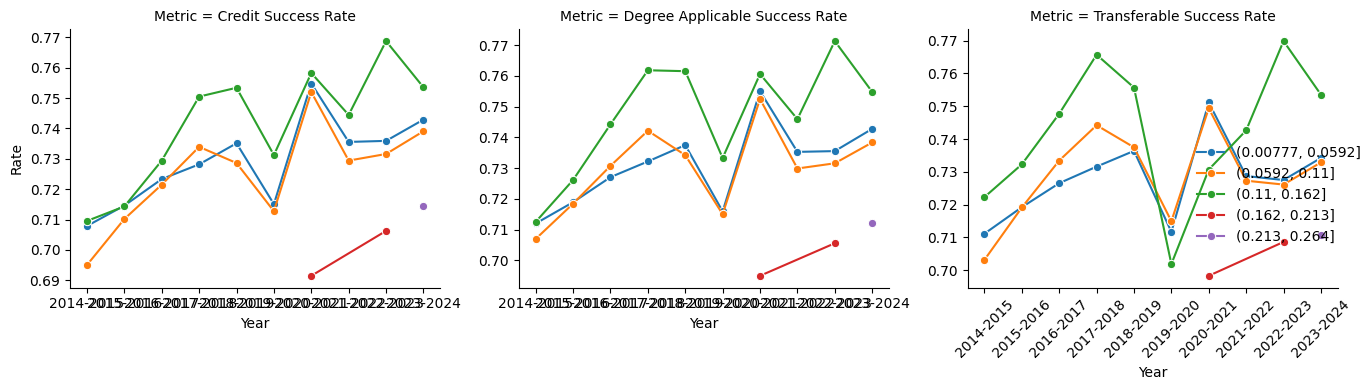

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

merged["Participation Bin"] = pd.cut(merged["EOPS Participation Rate"], bins=5)

summary = (
    merged.groupby(["Year", "Participation Bin"])
    .agg({
        "Credit Success Rate": "mean",
        "Degree Applicable Success Rate": "mean",
        "Transferable Success Rate": "mean"
    }).reset_index()
)

melted = summary.melt(id_vars=["Year", "Participation Bin"], var_name="Metric", value_name="Rate")

g = sns.FacetGrid(melted, col="Metric", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Rate", hue="Participation Bin", marker="o")
g.add_legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Create a readable summary table for reports or thesis
summary_table = (
    merged.groupby(["Year", "Participation Bin"])
    .agg({
        "Credit Success Rate": "mean",
        "Degree Applicable Success Rate": "mean",
        "Transferable Success Rate": "mean"
    })
    .round(4)
    .reset_index()
)

summary_table.head(10)  # Display first few rows


<ipython-input-9-08a2e3c3ca98>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(["Year", "Participation Bin"])


,Year,Participation Bin,Credit Success Rate,Degree Applicable Success Rate,Transferable Success Rate
0,2014-2015,"(0.00777, 0.0592]",0.7079,0.7120,0.7111
1,2014-2015,"(0.0592, 0.11]",0.6950,0.7070,0.7031
2,2014-2015,"(0.11, 0.162]",0.7095,0.7125,0.7223
3,2014-2015,"(0.162, 0.213]",NaN,NaN,NaN
4,2014-2015,"(0.213, 0.264]",NaN,NaN,NaN
5,2015-2016,"(0.00777, 0.0592]",0.7146,0.7189,0.7192
6,2015-2016,"(0.0592, 0.11]",0.7102,0.7184,0.7191
7,2015-2016,"(0.11, 0.162]",0.7143,0.7261,0.7323
8,2015-2016,"(0.162, 0.213]",NaN,NaN,NaN
9,2015-2016,"(0.213, 0.264]",NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Credit Success Rate'].plot(kind='hist', bins=20, title='Credit Success Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Degree Applicable Success Rate'].plot(kind='hist', bins=20, title='Degree Applicable Success Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Transferable Success Rate'].plot(kind='hist', bins=20, title='Transferable Success Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Credit Success Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Credit Success Rate', y='Degree Applicable Success Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Degree Applicable Success Rate', y='Transferable Success Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Credit Success Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Credit Success Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Degree Applicable Success Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Degree Applicable Success Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Transferable Success Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Transferable Success Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Credit Success Rate'].plot(kind='line', figsize=(8, 4), title='Credit Success Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Degree Applicable Success Rate'].plot(kind='line', figsize=(8, 4), title='Degree Applicable Success Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Transferable Success Rate'].plot(kind='line', figsize=(8, 4), title='Transferable Success Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Credit Success Rate', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Degree Applicable Success Rate', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Transferable Success Rate', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)